In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

In [3]:
url = 'https://drive.google.com/uc?id=1JAbg8D_2Ui4ittfs7O6YgAo-TwfUfmtJ'
baseball = pd.read_csv(url)

## 1. Further improvements on the dataset

### More intelligent indexing

Even though the above dataset is in a decent shape, there are still aspects of it that would benefit from further improvement. For one, an explicit index of 0-1231 is meaningless and not very useful for accessing rows - it would be more convenient to use something else. However, Indexing by year or by team alone would also not be a great idea, given that for each year and for each team there are many fields (all the teams' rows in a given year and each team's seasons through the years for a given team, respectively). We can, however, assign the combination of Year and Team as a multi-index, as follows: 

In [4]:
baseball = baseball.set_index(['Year', 'Team'])
baseball

League    G    W    L  Playoffs  ...    OBP    SLG    OPS   OOBP   OSLG
Year Team                                  ...                                   
2012 ARI      NL  162   81   81     False  ...  0.328  0.418  0.746  0.317  0.415
     ATL      NL  162   94   68      True  ...  0.320  0.389  0.709  0.306  0.378
     BAL      AL  162   93   69      True  ...  0.311  0.417  0.728  0.315  0.403
     BOS      AL  162   69   93     False  ...  0.315  0.415  0.730  0.331  0.428
     CHC      NL  162   61  101     False  ...  0.302  0.378  0.680  0.335  0.424
...          ...  ...  ...  ...       ...  ...    ...    ...    ...    ...    ...
1962 PHI      NL  161   81   80     False  ...  0.330  0.390  0.720    NaN    NaN
     PIT      NL  161   93   68     False  ...  0.321  0.394  0.715    NaN    NaN
     SFG      NL  165  103   62      True  ...  0.341  0.441  0.782    NaN    NaN
     STL      NL  163   84   79     False  ...  0.335  0.394  0.729    NaN    NaN
     WSA      AL  162   60  102     False  ...  0.308  0.373  0.681    NaN    NaN

[1232 rows x 15 columns]

Now, using `.loc[<year>]`, we can more simply access each year's dataset without having to resort to more unwieldy 

`baseball[baseball.Year == <year>]`

In [5]:
baseball.loc[2012]

,League,G,W,L,Playoffs,RankSeason,RankPlayoffs,RS,RA,BA,OBP,SLG,OPS,OOBP,OSLG
Team,,,,,,,,,,,,,,,
ARI,NL,162,81,81,False,NaN,NaN,734,688,0.259,0.328,0.418,0.746,0.317,0.415
ATL,NL,162,94,68,True,4.0,5.0,700,600,0.247,0.320,0.389,0.709,0.306,0.378
BAL,AL,162,93,69,True,5.0,4.0,712,705,0.247,0.311,0.417,0.728,0.315,0.403
BOS,AL,162,69,93,False,NaN,NaN,734,806,0.260,0.315,0.415,0.730,0.331,0.428
CHC,NL,162,61,101,False,NaN,NaN,613,759,0.240,0.302,0.378,0.680,0.335,0.424
CHW,AL,162,85,77,False,NaN,NaN,748,676,0.255,0.318,0.422,0.740,0.319,0.405
CIN,NL,162,97,65,True,2.0,4.0,669,588,0.251,0.315,0.411,0.726,0.305,0.390
CLE,AL,162,68,94,False,NaN,NaN,667,845,0.251,0.324,0.381,0.705,0.336,0.430
COL,NL,162,64,98,False,NaN,NaN,758,890,0.274,0.330,0.436,0.766,0.357,0.470


Using `pd.IndexSlice`, we can now more succinctly get more specific data for each team across a given period, e.g., to obtain the full data for the New York Yankees, we can use:

In [6]:
idx = pd.IndexSlice
baseball.loc[idx[:, "NYY"], idx[:]]

,,League,G,W,L,Playoffs,RankSeason,RankPlayoffs,RS,RA,BA,OBP,SLG,OPS,OOBP,OSLG
Year,Team,,,,,,,,,,,,,,,
2012,NYY,AL,162,95,67,True,3.0,3.0,804,668,0.265,0.337,0.453,0.790,0.311,0.419
2011,NYY,AL,162,97,65,True,2.0,4.0,867,657,0.263,0.343,0.444,0.787,0.322,0.399
2010,NYY,AL,162,95,67,True,3.0,3.0,859,693,0.267,0.350,0.436,0.786,0.322,0.399
2009,NYY,AL,162,103,59,True,1.0,1.0,915,753,0.283,0.362,0.478,0.840,0.327,0.408
2008,NYY,AL,162,89,73,False,NaN,NaN,789,727,0.271,0.342,0.427,0.769,0.329,0.405
2007,NYY,AL,162,94,68,True,2.0,4.0,968,777,0.290,0.366,0.463,0.829,0.340,0.417
2006,NYY,AL,162,97,65,True,1.0,4.0,930,767,0.285,0.363,0.461,0.824,0.326,0.413
2005,NYY,AL,162,95,67,True,3.0,4.0,886,789,0.276,0.355,0.450,0.805,0.332,0.422
2004,NYY,AL,162,101,61,True,2.0,3.0,897,808,0.268,0.353,0.458,0.811,0.328,0.432


## 2. Missing Values

`RankSeason` and `RankPlayoffs` apply only to teams' seasons (rows) that ended with a playoff appearance, therefore missing data for teams that did not make the playoffs that year. Since these variables are not instrumental for analysis - the mean, variance, and quartiles of these fields is meaningless - the fact that the data is missing is inconsequential. 

`OOBP` and `OSLG` are another two variables which do not have entries for the whole dataset. In this case, even though the complete data's presence would be beneficial for a more in-depth analysis of *what* helps a team succeed, the dataset is predominantly concerned with offensive statistics (runs scored, ratting average, on-base and slugging percentages). Nevertheless, especially since this data might still be useful for the overall picture, dropping these columns is unnecessary. Moreover, the missing data will not skew the analysis for the years that it's missing for. There is really no better value to replace the `NaN` entries with either, so it seems best to leave these columns as they are.

## 3. Variable Description

### Numeric Variables

(Some helper wrapper functions to simplify visualization)

In [7]:
def corr(column, colour):
  # computes and creates a visual map of correlations for a given column, accented with the passed colour
  corr = pd.DataFrame(baseball[baseball.columns[2:]].corr()[column]).transpose()
  display(corr)
  plt.figure(figsize=(10, 1))
  sns.heatmap(corr, cmap=colour, annot=True)

In [8]:
def dist(column):
  # displays a histogram and a approximate distribution line for a given column
  sns.histplot(baseball[column], kde=True)

In [9]:
def box(column):
  # displays a box-and-whiskers plot for a given column
  plt.figure(figsize=(3, 5))
  sns.boxplot(y=baseball[column])

In [10]:
def ci(x):
  # 95% confidence interval for μ of a normal
  mean = baseball[x].mean()
  std = baseball[x].std()
  var = baseball[x].var()
  n = len(baseball[x])
  return sp.stats.t.interval(alpha=0.95, df=n-1, loc=mean, scale=sp.stats.sem(baseball[x]))

In [11]:
def outliers(c):
  # finds and returns all the outliers (inner fence)
  iqr = baseball[c].quantile(0.75) - baseball[c].quantile(0.25)
  inner = iqr * 1.5

  low_inner = baseball[c].quantile(0.25) - inner
  high_inner = baseball[c].quantile(0.75) + inner
  outlier = {
      'low': [x for x in baseball[c] if x < low_inner],
      'high': [x for x in baseball[c] if x > high_inner], 
      }
  return outlier

#### Games Played, Wins, Losses


These three variables denote the total games played by each team in the season, as well as their win - loss totals, respectively. The `Games` column is mostly the same for all teams (with few exceptions in the form of tie-breakers), since the MLB baseball season comprised of 162 games throghout the period described by this dataset. The `Win` and `Loss` columns are the main metric for a team's performance in a given season.

In [12]:
baseball.G.describe()

count    1232.000000
mean      161.918831
std         0.624365
min       158.000000
25%       162.000000
50%       162.000000
75%       162.000000
max       165.000000
Name: G, dtype: float64

In [13]:
baseball.W.describe()

count    1232.000000
mean       80.904221
std        11.458139
min        40.000000
25%        73.000000
50%        81.000000
75%        89.000000
max       116.000000
Name: W, dtype: float64

In [14]:
baseball.L.describe()

count    1232.000000
mean       81.014610
std        11.409295
min        46.000000
25%        73.000000
50%        81.000000
75%        89.000000
max       121.000000
Name: L, dtype: float64

Of note in the above descriptions are their respective `min` and `max` values which indicate outliers. It is understandable that Major League Baseball would pursue parity, and thus most teams do not win more than 60% of their games. However, exceptional seasons do exist in both columns.

We can find the correlations between the `Win` column and other columns with the command below (using the `corr()` function we defined earlier):

,W,L,Playoffs,RankSeason,RankPlayoffs,RS,RA,BA,OBP,SLG,OPS,OOBP,OSLG
W,1.0,-0.998518,0.616757,-0.755098,-0.19896,0.511745,-0.532394,0.408716,0.481836,0.401496,0.446972,-0.634315,-0.56849


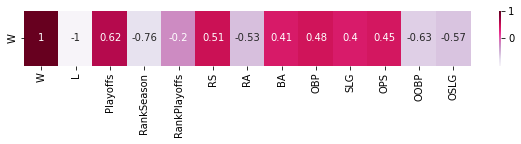

In [15]:
corr("W", "PuRd")

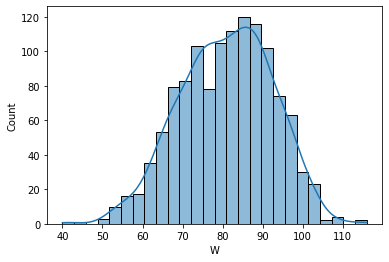

In [16]:
dist("W")

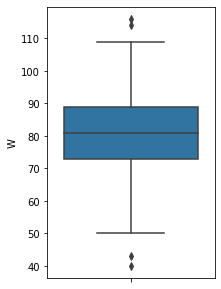

In [17]:
box("W")

In [18]:
outliers("W")

{'high': [116, 114], 'low': [43, 40]}

Similarly, for losses:

,W,L,Playoffs,RankSeason,RankPlayoffs,RS,RA,BA,OBP,SLG,OPS,OOBP,OSLG
L,-0.998518,1.0,-0.618182,0.753318,0.197275,-0.509821,0.533394,-0.409377,-0.482993,-0.401202,-0.447137,0.634181,0.570313


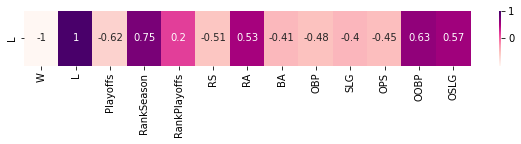

In [19]:
corr("L", "RdPu")

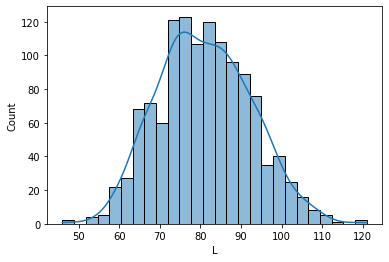

In [20]:
dist("L")

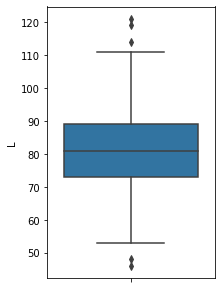

In [21]:
box("L")

In [22]:
outliers("L")

{'high': [119, 114, 121], 'low': [46, 48]}

Unsurprisingly, the `W` and `L` are negatively correlated wiht value 1 - since these two columns are related by each other linearly (G = W + L), anything that benefits from a higher `Win` total is hurt by a higher `Loss` total and vice versa. (The correlation value being slightly above -1 in each case is most likely due to the slight variations in the number of games played - some teams may have needed tie-breakers at the end of their season).

Both variables appear to be normally distributed with a mean of about 81, which is half of the baseball season. There don't seem to be many outliers, either - vast majority of the datapoints seem to be contained within the whiskers, with only a few particularly exceptionally good or bad seasons sprinkled outside of the ranges.

#### Playoffs

A boolean variable (originally 1 and 0). Indicates whether a given season ended with a playoff appearance. Since this variable only takes on binary values, a mean and quartiles are meaningless. However, correlation with other variables is a valid aspect of this column that we can explore:

,W,L,Playoffs,RankSeason,RankPlayoffs,RS,RA,BA,OBP,SLG,OPS,OOBP,OSLG
Playoffs,0.616757,-0.618182,1.0,NaN,NaN,0.386628,-0.261477,0.290217,0.36389,0.324713,0.353084,-0.433572,-0.366744


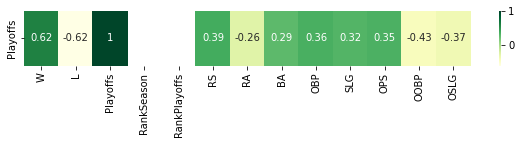

In [23]:
corr("Playoffs", "YlGn")

`RankSeason` and `RankPlayoffs` do not have a correlation value which is understandable, since these two variables are fully dependent on `Playoffs` being equal to `True` (and do not have a value otherwise - therefore, a change in `Playoffs` is only a change in whether a value in those columns exists without a mapping to the value itself).

Note: Throghout the years, the format of MLB Playoffs changed. In this dataset, in the years 1962-1969 "playoffs" consisted of only the World Series - one game between the Win-Loss record-wise top teams in the American League and National League. While this does mean that for those seasons fewer teams would have made the playoffs, it shouldn't affect the observations in the larger picture (particularly the positive correlations between reaching the playoffs and win totals or offensive statistics). Because of this, the columns `RankSeason` and `RankPlayoffs` might be slightly affected (mostly their correlations, since the mean and distribution are of no real value for analysis - each year carries a similar number of playoff teams and their rankings with respect to each other).

#### RankSeason, RankPlayoffs

Both are a team's final ranking. `RankSeason` describes the team's final position among other playoff teams, whereas `RankPlayoffs` describes the team's final position in the playoffs. The min, max, median, and mean carry little meaning, since these values are almost categorical in nature. I found, however, that setting these variables as category creates issues with come visualization methods (e.g. the correlation matrices), thus for the time being I've left these variables as numerical values.

,W,L,Playoffs,RankSeason,RankPlayoffs,RS,RA,BA,OBP,SLG,OPS,OOBP,OSLG
RankSeason,-0.755098,0.753318,NaN,1.0,0.266906,-0.027687,0.399141,0.035452,0.001612,0.126663,0.091546,0.097731,0.050111


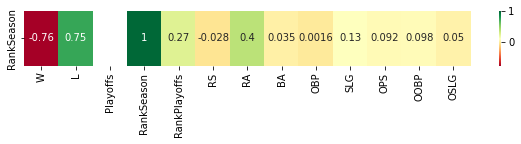

In [24]:
corr("RankSeason", "RdYlGn")

,W,L,Playoffs,RankSeason,RankPlayoffs,RS,RA,BA,OBP,SLG,OPS,OOBP,OSLG
RankPlayoffs,-0.19896,0.197275,NaN,0.266906,1.0,0.210963,0.315128,0.092684,0.175349,0.271893,0.255472,0.065808,0.087089


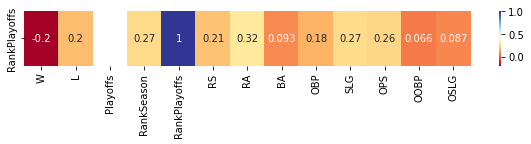

In [25]:
corr("RankPlayoffs", "RdYlBu")

A curious aspect of these correlation values as they relate to the offensive statistics: since both RankSeason and RankPlayoffs are in ascending order, the best team is the one with the lowest value (certainly with regard to RankPlayoffs). Nevertheless, while this is reflected by a negative correlation with the Win column (the more wins, the better the team, the higher likelihood of it doing better in the Plaoyffs), there is very little to no correlation between final placing and batting statistics - which appears anomalous. It could be that the teams that make the playoffs are already so good that they are mostly even matched as far as batting statistics go, even more so than they are with regard to Win-Loss records. This warrants further looking into.

#### Runs Scored, Runs Against

The runs scored and runs agains columns go hand-in-hand with each other, given that their means and quartiles should end up almost identical - after all, over the span of this dataset, all the seasons' stats are accounted for, which means that, overall, the number of runs scored against all the teams is equal to the number of runs scored *by* all the teams. Nevertheless, this column will prove useful for correlations, as well as for higher-level analysis, when considering what other metrics contribute to a high Runs Scored total (and thus, indirectly, to a high Win total - correlation 0.51)

In [26]:
baseball.RS.describe()

count    1232.000000
mean      715.081981
std        91.534294
min       463.000000
25%       652.000000
50%       711.000000
75%       775.000000
max      1009.000000
Name: RS, dtype: float64

In [27]:
baseball.RA.describe()

count    1232.000000
mean      715.081981
std        93.079933
min       472.000000
25%       649.750000
50%       709.000000
75%       774.250000
max      1103.000000
Name: RA, dtype: float64

,W,L,Playoffs,RankSeason,RankPlayoffs,RS,RA,BA,OBP,SLG,OPS,OOBP,OSLG
RS,0.511745,-0.509821,0.386628,-0.027687,0.210963,1.0,0.380139,0.827,0.900492,0.91874,0.956943,0.133981,0.193426


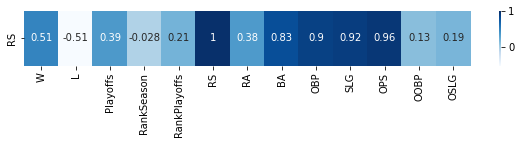

In [28]:
corr("RS", "Blues")

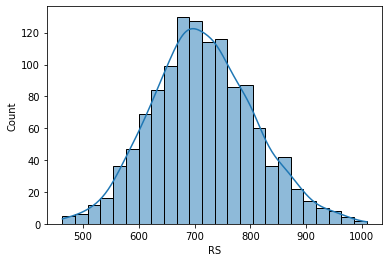

In [29]:
dist("RS")

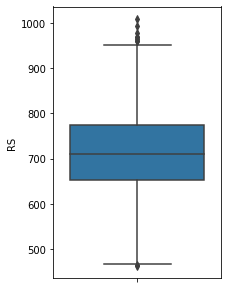

In [30]:
box("RS")

In [31]:
outliers("RS")

{'high': [968, 961, 978, 968, 1009, 965, 961, 993], 'low': [463, 464]}

,W,L,Playoffs,RankSeason,RankPlayoffs,RS,RA,BA,OBP,SLG,OPS,OOBP,OSLG
RA,-0.532394,0.533394,-0.261477,0.399141,0.315128,0.380139,1.0,0.330764,0.32636,0.436527,0.421601,0.910344,0.909319


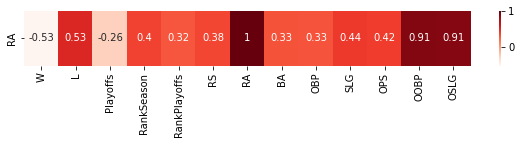

In [32]:
corr("RA", "Reds")

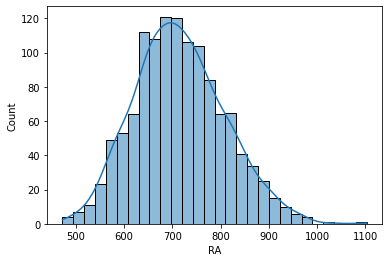

In [33]:
dist("RA")

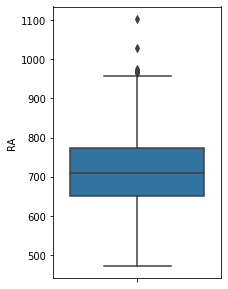

In [34]:
box("RA")

#### Batting Average

A simple ratio of hits to at-bats. For years considered to be the main metric for evaluation of offensive talent, but when more informative statistics were developed, team executives realized that this stat does not tell the whole story.

In [35]:
baseball.BA.describe()

count    1232.000000
mean        0.259273
std         0.012907
min         0.214000
25%         0.251000
50%         0.260000
75%         0.268000
max         0.294000
Name: BA, dtype: float64

,W,L,Playoffs,RankSeason,RankPlayoffs,RS,RA,BA,OBP,SLG,OPS,OOBP,OSLG
BA,0.408716,-0.409377,0.290217,0.035452,0.092684,0.827,0.330764,1.0,0.851958,0.790481,0.848502,0.187108,0.227808


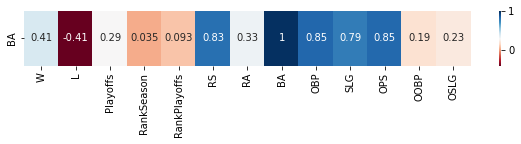

In [36]:
corr("BA", "RdBu")

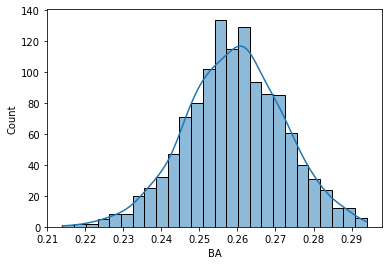

In [37]:
dist("BA")

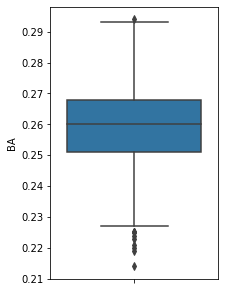

In [38]:
box("BA")

In [39]:
outliers("BA")

{'high': [0.294],
 'low': [0.225,
  0.225,
  0.214,
  0.22399999999999998,
  0.225,
  0.225,
  0.223,
  0.221,
  0.22,
  0.21899999999999997]}

#### On-Base Percentage

On-Base Percentage is an expansion on the Batting Average - OBP takes into account also things like walks and hits by pitch (where the batter get to take the first base for free). The formula is:

OBP = (Hits + Walks + Hit-By-Pitch)/(Plate Appearances + Walks + Hit-By-Pitch + Sacrifice Fly)

Since a runner can score regardless of how they got on base, this stat gives more information that simple Batting Average - leading teams to realize that it might be as - if not more - effective in providing a numeric value to a player.

In [40]:
baseball.OBP.describe()

count    1232.000000
mean        0.326331
std         0.015013
min         0.277000
25%         0.317000
50%         0.326000
75%         0.337000
max         0.373000
Name: OBP, dtype: float64

,W,L,Playoffs,RankSeason,RankPlayoffs,RS,RA,BA,OBP,SLG,OPS,OOBP,OSLG
OBP,0.481836,-0.482993,0.36389,0.001612,0.175349,0.900492,0.32636,0.851958,1.0,0.79091,0.897059,0.120349,0.153372


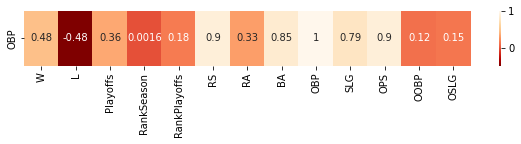

In [41]:
corr("OBP", "OrRd_r")

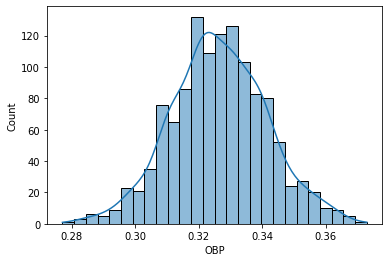

In [42]:
dist("OBP")

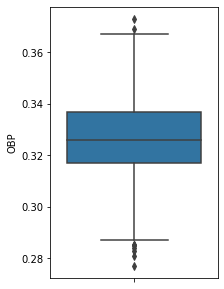

In [43]:
box("OBP")

In [44]:
outliers("OBP")

{'high': [0.373, 0.369],
 'low': [0.285,
  0.284,
  0.281,
  0.27699999999999997,
  0.285,
  0.28300000000000003,
  0.285]}

#### Slugging Percentage

Slugging Percentage, or the propensity for an offence (or a player) to reach extra bases. The formula is, where "XB" denotes the number of hits that allowed the batter to reach base X (1 - first, 2 - second, 3 - third, 4 - home run):

SLG = ((1 * 1B) + (2 * 2B) + (3 * 3B) + (4 * HR))/Plate appearances

In practice, this is a statistic that denotes the 'power' (or slugging) of a hitter, and, since a hit that advances the batter to the second base has a higher likelihood to allow more runners to score - players with a high SLG stat should provide a valuable impact to any offense.

In [45]:
baseball.SLG.describe()

count    1232.000000
mean        0.397342
std         0.033267
min         0.301000
25%         0.375000
50%         0.396000
75%         0.421000
max         0.491000
Name: SLG, dtype: float64

,W,L,Playoffs,RankSeason,RankPlayoffs,RS,RA,BA,OBP,SLG,OPS,OOBP,OSLG
SLG,0.401496,-0.401202,0.324713,0.126663,0.271893,0.91874,0.436527,0.790481,0.79091,1.0,0.979913,0.143861,0.210423


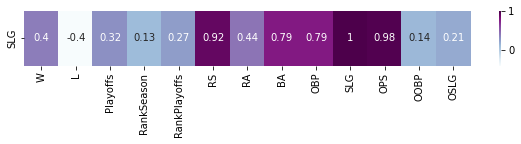

In [46]:
corr("SLG", "BuPu")

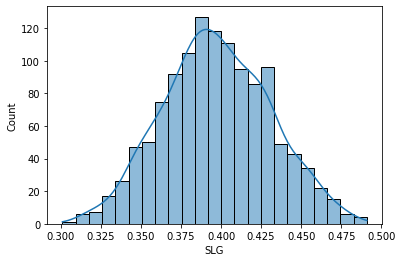

In [47]:
dist("SLG")

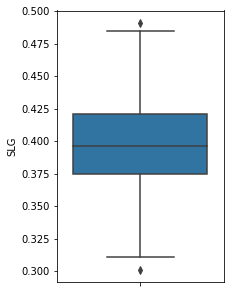

In [48]:
box("SLG")

In [49]:
outliers("SLG")

{'high': [0.491], 'low': [0.301]}

#### On-Base + Slugging (OPS)

OPS is simply a sum of On-Base Percentage and Slugging Percentage. Some prolific sluggers might not be partucularly great at getting on base. Conversely, some great contact hitters/disciplined batters who draw many walks might not be hitting for power. The OPS stat allows these deficiencies in one area to potentially balance out. Indeed, although the team Runs Scored statistic is strongly correlated with all of the other offensive statistics as well (BA: 0.827	OBP: 0.900492	SLG: 0.91874)	, its correlation with OPS is the greatest (0.956943).

In [54]:
baseball.OPS.describe()

count    1232.000000
mean        0.723673
std         0.046066
min         0.584000
25%         0.694000
50%         0.722000
75%         0.755000
max         0.851000
Name: OPS, dtype: float64

,W,L,Playoffs,RankSeason,RankPlayoffs,RS,RA,BA,OBP,SLG,OPS,OOBP,OSLG
OPS,0.446972,-0.447137,0.353084,0.091546,0.255472,0.956943,0.421601,0.848502,0.897059,0.979913,1.0,0.143209,0.201116


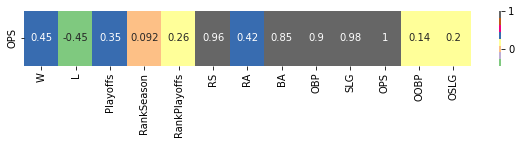

In [53]:
corr("OPS", "Accent")

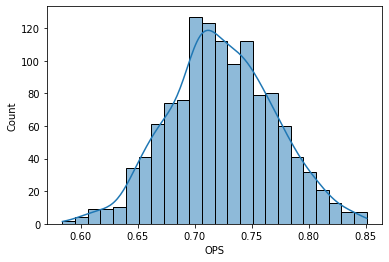

In [55]:
dist("OPS")

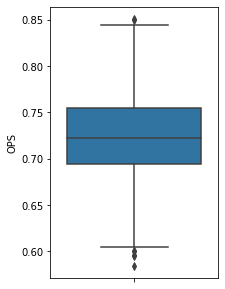

In [56]:
box("OPS")

In [57]:
outliers("OPS")

{'high': [0.851, 0.85], 'low': [0.595, 0.596, 0.6, 0.584, 0.6]}

#### Opponents' On-Base and Opponents' Slugging (OOBP and OSLG)

Opponents' On-Base and Slugging percentages are - unlike almost everything so far - not offensive, but defensive statistics. There are other defensive statistics (such as ERA - Earned Run Average for pitchers) that could have been included in this dataset as well, but OOBP and OSLG can also indicate what kinds of players are useful (or to be avoided - e.g., pitchers who give up a lot of hits/have a high slugging percentage against them). Both stats are understandably strongly correlated with the `Runs Against` and `Losses` columns.

In [58]:
baseball.OOBP.describe()

count    420.000000
mean       0.332264
std        0.015295
min        0.294000
25%        0.321000
50%        0.331000
75%        0.343000
max        0.384000
Name: OOBP, dtype: float64

,W,L,Playoffs,RankSeason,RankPlayoffs,RS,RA,BA,OBP,SLG,OPS,OOBP,OSLG
OOBP,-0.634315,0.634181,-0.433572,0.097731,0.065808,0.133981,0.910344,0.187108,0.120349,0.143861,0.143209,1.0,0.830902


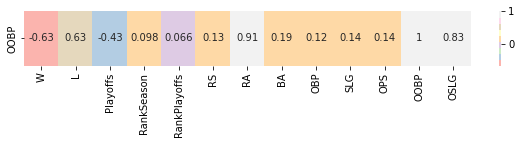

In [59]:
corr("OOBP", "Pastel1")

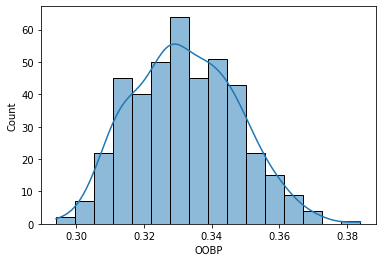

In [60]:
dist("OOBP")

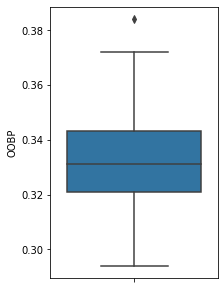

In [61]:
box("OOBP")

In [62]:
outliers("OOBP")

{'high': [0.384], 'low': []}

In [63]:
baseball.OSLG.describe()

count    420.000000
mean       0.419743
std        0.026510
min        0.346000
25%        0.401000
50%        0.419000
75%        0.438000
max        0.499000
Name: OSLG, dtype: float64

,W,L,Playoffs,RankSeason,RankPlayoffs,RS,RA,BA,OBP,SLG,OPS,OOBP,OSLG
OSLG,-0.56849,0.570313,-0.366744,0.050111,0.087089,0.193426,0.909319,0.227808,0.153372,0.210423,0.201116,0.830902,1.0


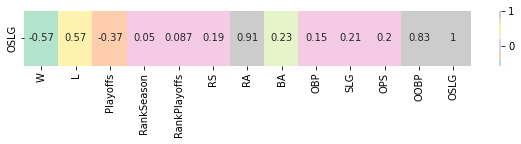

In [64]:
corr("OSLG", "Pastel2")

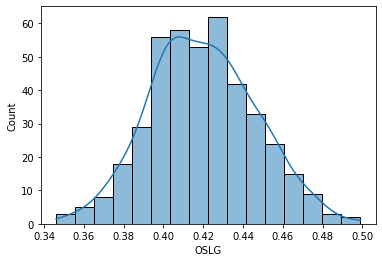

In [65]:
dist("OSLG")

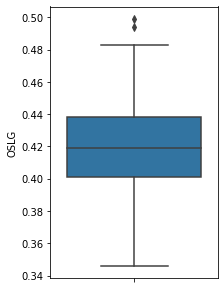

In [66]:
box("OSLG")

In [67]:
outliers("OSLG")

{'high': [0.494, 0.499], 'low': []}

## Summary

Below is a description of the numerical variables contained within the dataset. Due to the sample size and relative even distribution of the data, the mean and the median are very close in each column:

In [68]:
baseball.describe()

,G,W,L,RankSeason,RankPlayoffs,RS,RA,BA,OBP,SLG,OPS,OOBP,OSLG
count,1232.000000,1232.000000,1232.000000,244.000000,244.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,420.000000,420.000000
mean,161.918831,80.904221,81.014610,3.122951,2.717213,715.081981,715.081981,0.259273,0.326331,0.397342,0.723673,0.332264,0.419743
std,0.624365,11.458139,11.409295,1.738349,1.095234,91.534294,93.079933,0.012907,0.015013,0.033267,0.046066,0.015295,0.026510
min,158.000000,40.000000,46.000000,1.000000,1.000000,463.000000,472.000000,0.214000,0.277000,0.301000,0.584000,0.294000,0.346000
25%,162.000000,73.000000,73.000000,2.000000,2.000000,652.000000,649.750000,0.251000,0.317000,0.375000,0.694000,0.321000,0.401000
50%,162.000000,81.000000,81.000000,3.000000,3.000000,711.000000,709.000000,0.260000,0.326000,0.396000,0.722000,0.331000,0.419000
75%,162.000000,89.000000,89.000000,4.000000,4.000000,775.000000,774.250000,0.268000,0.337000,0.421000,0.755000,0.343000,0.438000
max,165.000000,116.000000,121.000000,8.000000,5.000000,1009.000000,1103.000000,0.294000,0.373000,0.491000,0.851000,0.384000,0.499000


As described by pandas' `describe()` method seen in the cell above, there are 13 numerical variables (although the 14th, 'Playoffs', is also numerically-convertible) in the DataFrame. Of these, while some aren't very useful for variable analysis, all are valid for correlation:

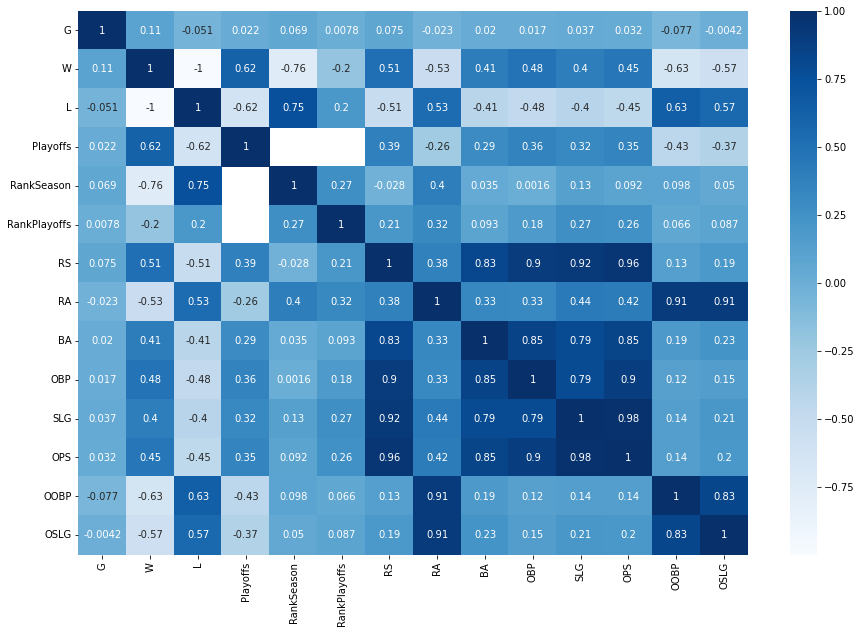

In [69]:
plt.figure(figsize=(15, 10))
sns.heatmap(baseball.corr(), cmap='Blues', annot=True)

However, when trying to establish the approximate distributions, it is relatively meaningless to try to do so for "Games", "Playoffs", "RankSeason", and "RankPlayoffs" - since all are pretty much constant and their randomness is relatively inconsequential on the scope of the entire dataset (while their assignment is random, their values are - for the most part - not. In each given year, there will be one World Series winner denoted by a `1.0` in RankPlayoffs column, and so on).

The remaining variables' distribution are plotted below via histograms and kernel density estimates. For the most part, all 10 of these variables appear to be distributed normally, and - due to the sample size for each column - their arithmetic estimators for mean and variance should be relatively accurate to the actual mean and variance of the underlying distributions. 

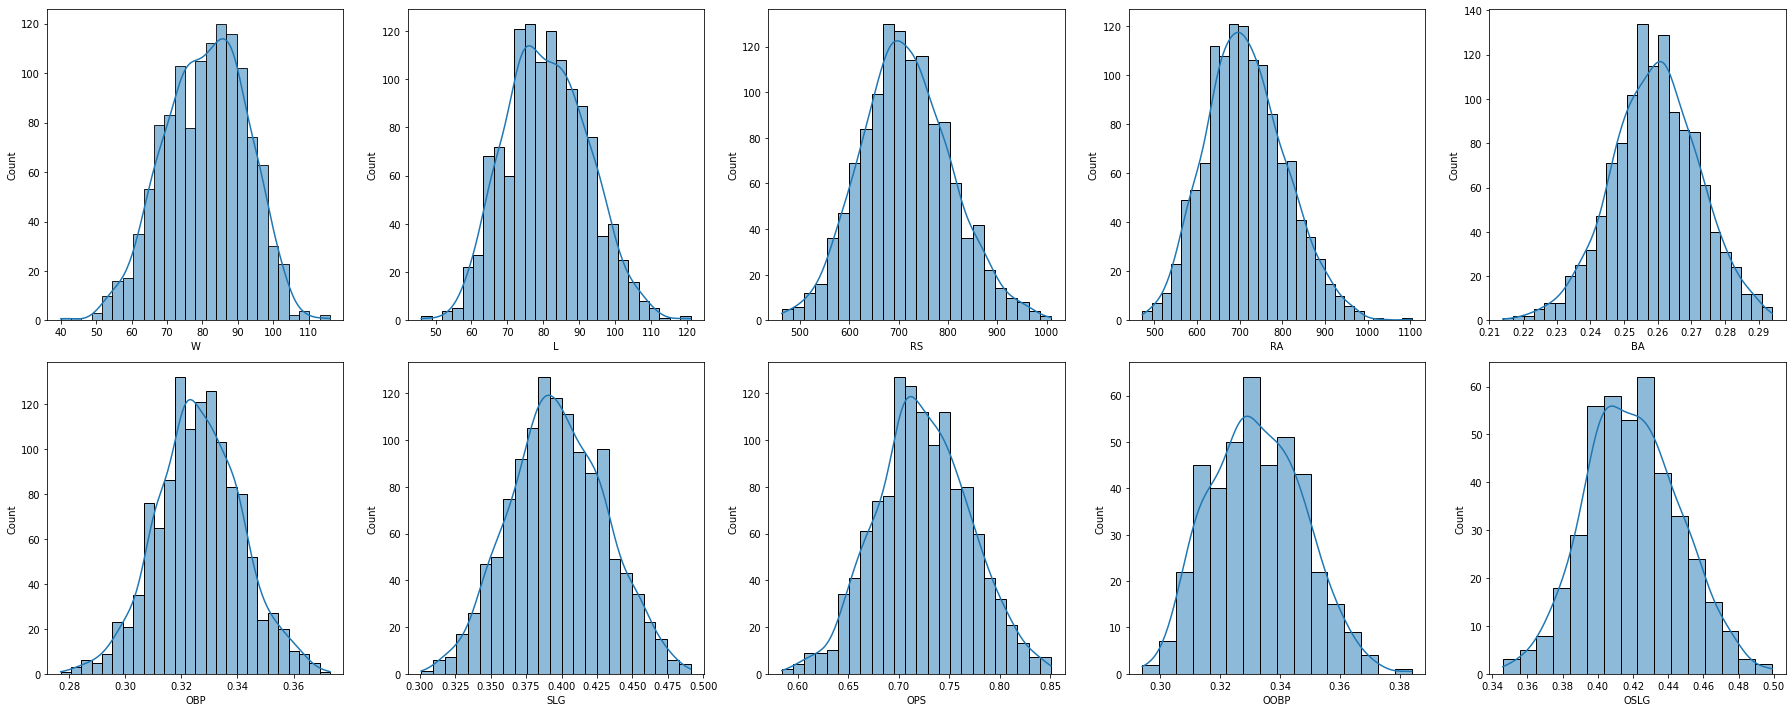

In [ ]:
plt.figure(figsize=(25, 10))
columns = ['W', 'L', 'RS', 'RA', 'BA', 'OBP', 'SLG', 'OPS', 'OOBP', 'OSLG']
for i in range(len(columns)):
  plt.subplot(2, len(columns)/2, i+1)
  sns.histplot(baseball[columns[i]], kde=True)
  plt.tight_layout()

From the box-and-whisker plots below, we can see that the data has relatively few outliers overall, though most of the league appears to have been not too far away from the median:

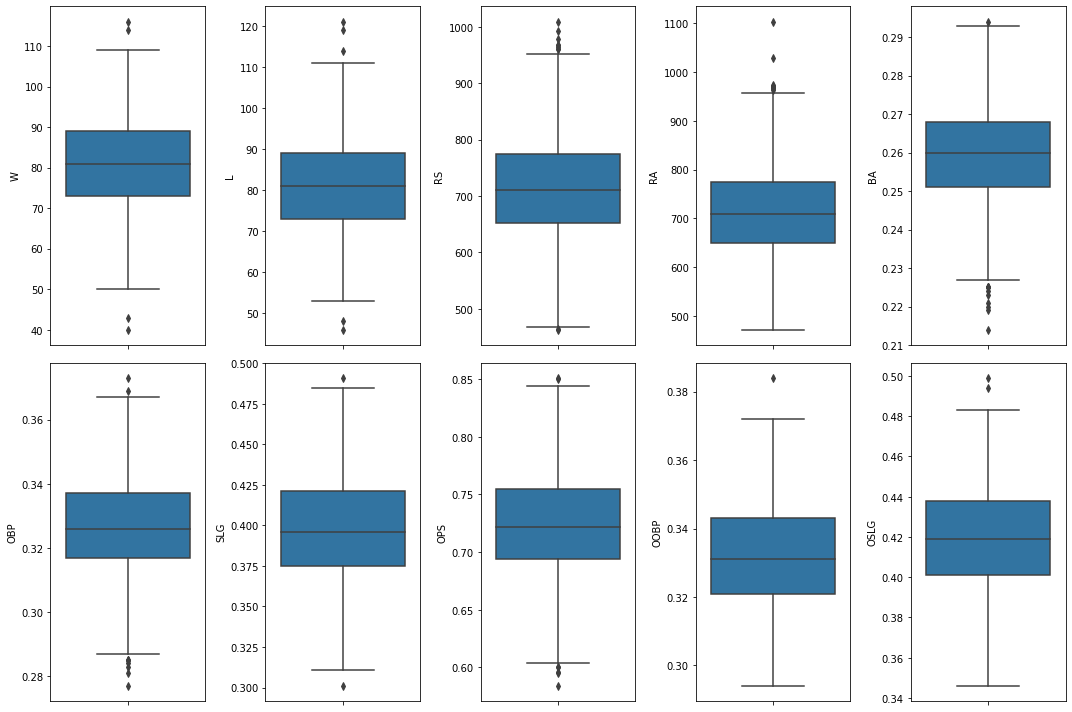

In [ ]:
plt.figure(figsize=(15, 10))
for i in range(len(columns)):
  plt.subplot(2, len(columns)/2, i+1)
  sns.boxplot(y=baseball[columns[i]], orient='v')
  plt.tight_layout()